In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib



In [89]:
# Load dataset
df = pd.read_csv('Blood-donation.csv')



In [90]:
# Drop unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)


In [91]:
# Basic info and target distribution
print(df.info())
print(df['Category'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB
None
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


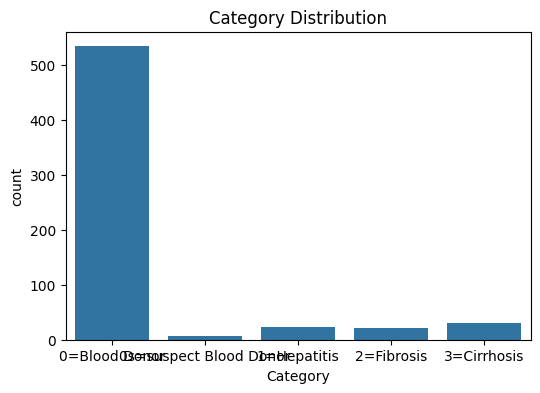

In [92]:
# EDA Visualizations
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.show()

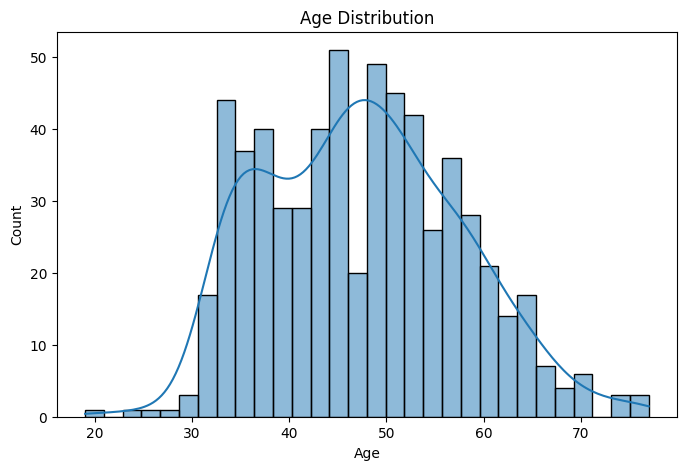

In [93]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

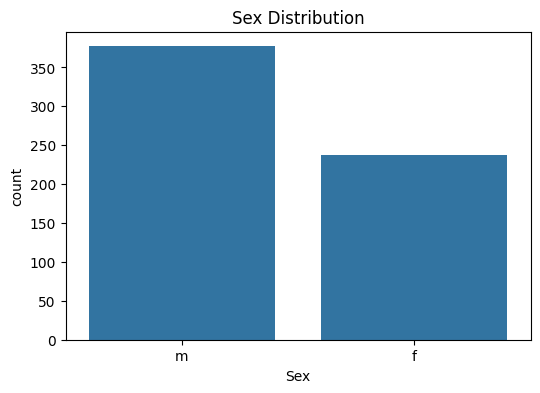

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()

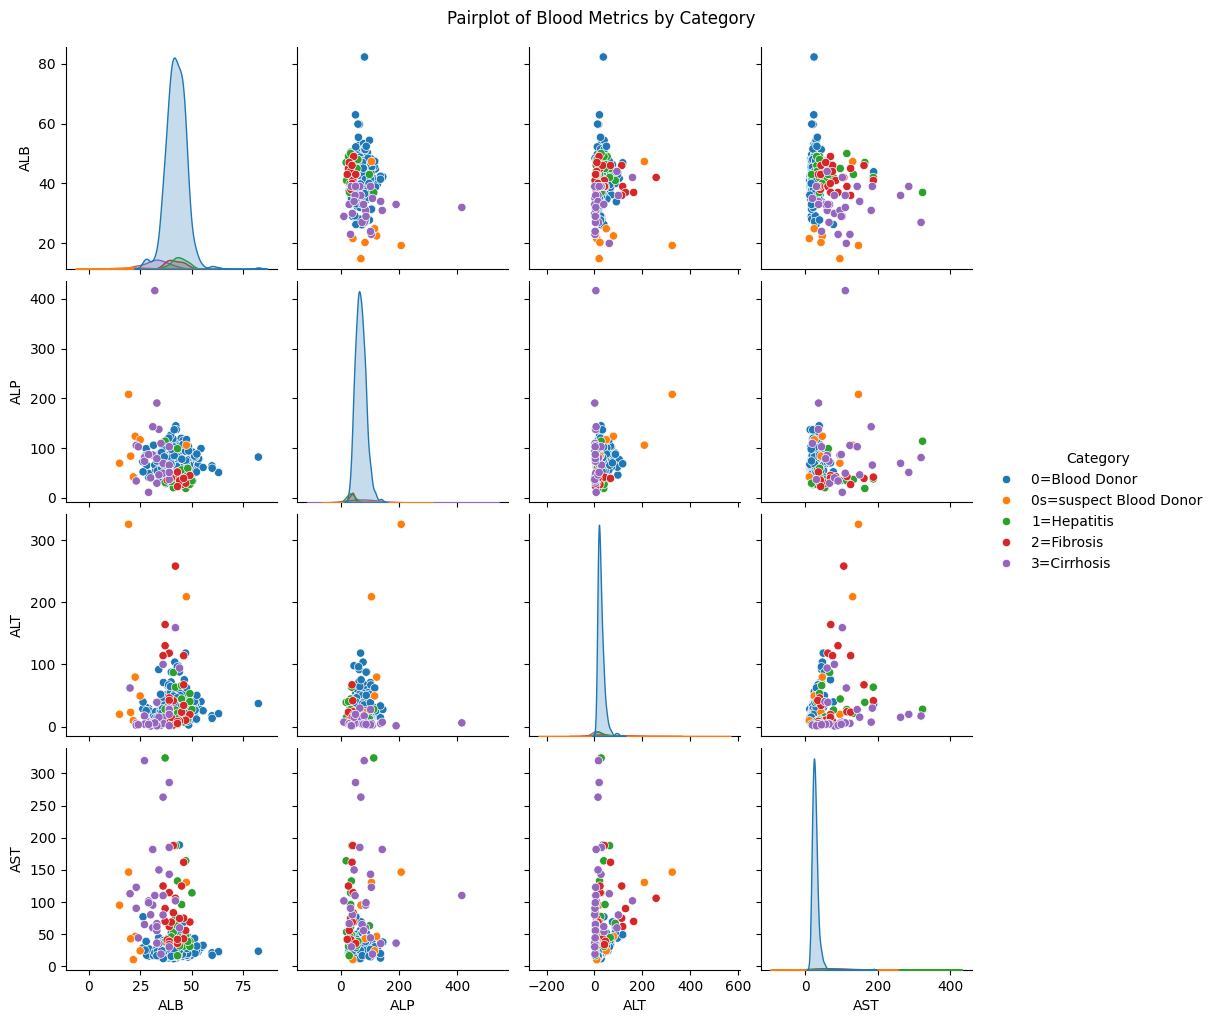

In [95]:
sns.pairplot(df, vars=['ALB', 'ALP', 'ALT', 'AST'], hue='Category')
plt.suptitle('Pairplot of Blood Metrics by Category', y=1.02)
plt.show()

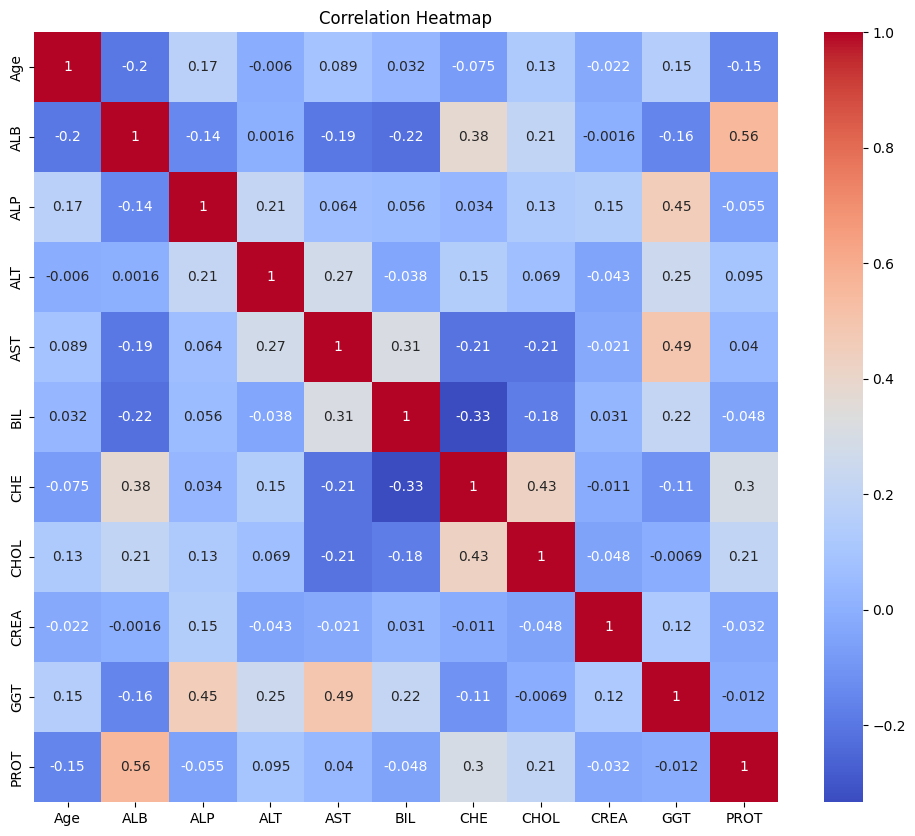

In [96]:
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [97]:
# Encode categorical variables
le_sex = LabelEncoder()
le_cat = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Category'] = le_cat.fit_transform(df['Category'])



In [98]:
# Define features and target
X = df.drop(columns=['Category'])
y = df['Category']

In [99]:
# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [100]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


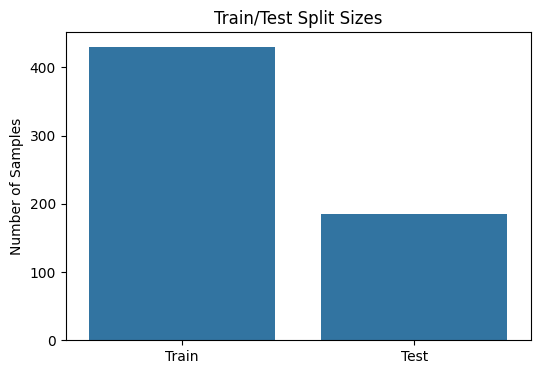

In [101]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

plt.figure(figsize=(6,4))
sns.barplot(x=['Train', 'Test'], y=[len(y_train), len(y_test)])
plt.title('Train/Test Split Sizes')
plt.ylabel('Number of Samples')
plt.show()


In [102]:
# Train SVM classifier
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [103]:
# Predictions
y_pred = svm_clf.predict(X_test)

Accuracy Score: 0.8648648648648649
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       153
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        10
           3       0.33      0.12      0.18         8
           4       0.60      0.55      0.57        11

    accuracy                           0.86       185
   macro avg       0.36      0.33      0.34       185
weighted avg       0.79      0.86      0.82       185

Confusion Matrix:
 [[153   0   0   0   0]
 [  1   0   0   0   2]
 [  8   0   0   1   1]
 [  6   0   0   1   1]
 [  4   0   0   1   6]]


d:\PYTHON\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\PYTHON\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\PYTHON\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


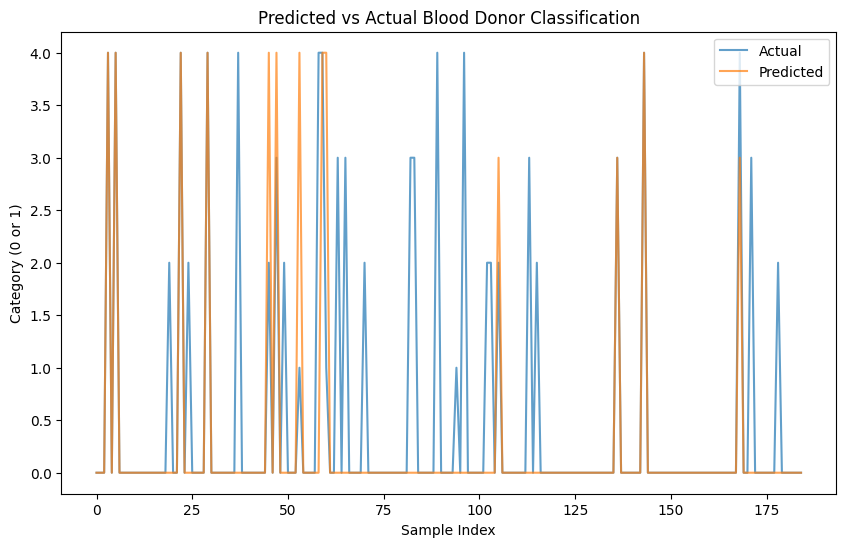

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [104]:
# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.title('Predicted vs Actual Blood Donor Classification')
plt.xlabel('Sample Index')
plt.ylabel('Category (0 or 1)')
plt.legend()
plt.show()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

In [105]:
# Predict using best model
y_pred = best_svm.predict(X_test)

Accuracy Score: 0.9135135135135135
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       153
           1       1.00      0.67      0.80         3
           2       0.80      0.40      0.53        10
           3       0.43      0.38      0.40         8
           4       1.00      0.64      0.78        11

    accuracy                           0.91       185
   macro avg       0.83      0.62      0.70       185
weighted avg       0.91      0.91      0.90       185



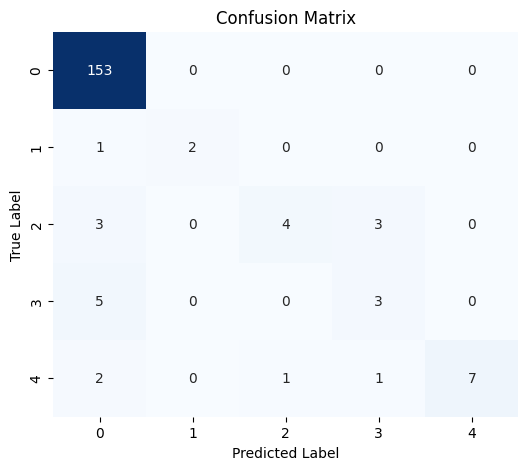

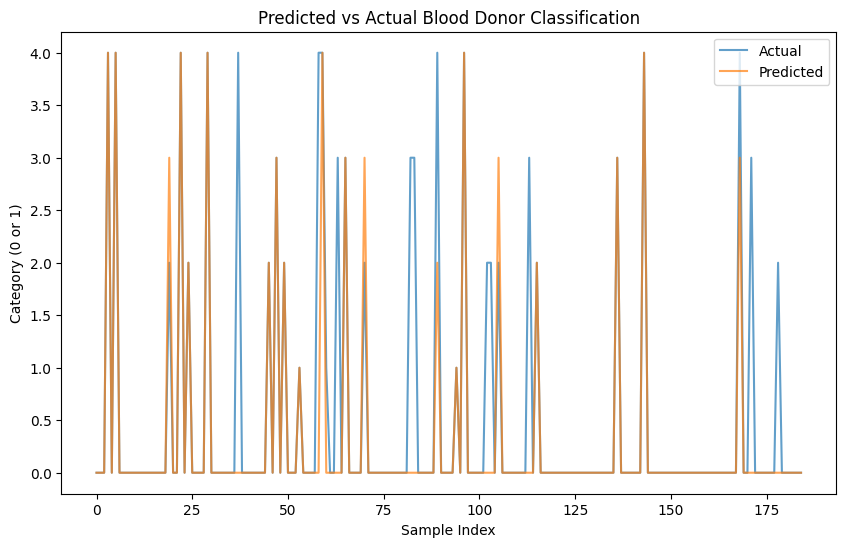

In [109]:
# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.title('Predicted vs Actual Blood Donor Classification')
plt.xlabel('Sample Index')
plt.ylabel('Category (0 or 1)')
plt.legend()
plt.show()



In [108]:
# Export the best model
joblib.dump(best_svm, '23MID0037-svm_blood_donor_best_model.pkl')
print("Best model exported as svm_blood_donor_best_model.pkl")

Best model exported as svm_blood_donor_best_model.pkl
